# LAB 7 : Image Classification using Convolutional Neural Networks 

Name : 

Roll Number : 
  

#**Problem 1** : Demonstrate Image Classification using CNNs on MNIST Fashion Dataset 

Steps : 

1. Download the MNIST fashion dataset (Available on Kaggle), there are 60,000 examples in the training set spanning all the 10 classes, Take a subset of this (around 1000 examples from each class) and make sure to have a balanced dataset, follow the same procedure for the test set (Maintain a 90:10 split between Train and Test set). Create a proper analysis table of the dataset using histogram plots.

2. Design a convolutional neural network using appropriate layers (Feel free to experiment around this) using any of the Frameworks (Keras/Pytorch/Tensorflow).

3. Consider suitable evaluation metrics and use plots as well as confusion matrix to highlight the accuracy, precision, recall and F1 score on both train and test set.

4. If you observe degradation in test accuracy make suitable changes to the network to encounter the problem.

**Note** : 
  1. There are no restrications on the usage Libraries as well as Frameworks.
  
  2. In this Lab, the emphasis will be more on your presentation rather than the solution, so make sure to include appropriate plots and tables to highlight your observations.

  3. You can also perform the experiment on a different dataset of Image classification as well but make sure to use balanced data.

##Write down the Objectives, Hypothesis and Experimental description for the above problem


## Programming : 
  Please write a program to demonstrate the same

In [1]:
## Write your code here
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
!cp '/content/gdrive/MyDrive/archive.zip' mnist

In [3]:
!unzip /content/mnist

Archive:  /content/mnist
  inflating: fashion-mnist_test.csv  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-images-idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: train-labels-idx1-ubyte  


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from matplotlib import pyplot as plt

In [5]:
train = pd.read_csv("/content/fashion-mnist_train.csv")
test = pd.read_csv("/content/fashion-mnist_test.csv")
print("Loaded the fashion mnist datasets")
print("train", train.shape)
print("test", test.shape)

groups = train.groupby('label')
train = groups.apply(lambda x:x.sample(frac=1)[:1000]) # shuffled before get values
train = train.sample(frac=1, random_state=42).reset_index(drop=True)
print("train", train.shape)

groups = test.groupby('label')
test = groups.apply(lambda x:x.sample(frac=1)[:100]) # shuffled before get values
test = test.sample(frac=1, random_state=42).reset_index(drop=True)
print("test", test.shape)

labels = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

Loaded the fashion mnist datasets
train (60000, 785)
test (10000, 785)
train (10000, 785)
test (1000, 785)


In [6]:
Y_train = to_categorical(train["label"], num_classes=10)

Y_test  = to_categorical(test["label"], num_classes=10)


print("X data needs to be reformed and normalized")
X_train = train.drop(labels = ["label"],axis = 1)
X_train = X_train / 255.0
X_train = X_train.values.reshape(-1, 28, 28)

X_test = test.drop(labels = ["label"],axis = 1)
X_test = X_test / 255.0
X_test = X_test.values.reshape(-1, 28, 28)

print(X_train.shape)
print(X_test.shape)



X data needs to be reformed and normalized
(10000, 28, 28)
(1000, 28, 28)


(1000, 28, 28, 1) (1000, 10)


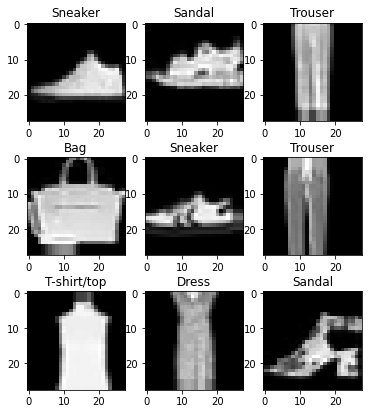

In [7]:
from keras.preprocessing.image import ImageDataGenerator

def train_generator(x, y, batch_size, shift_fraction=0.):
        train_datagen = ImageDataGenerator( width_shift_range=shift_fraction,
                                           height_shift_range=shift_fraction)  # shift up to 2 pixel for MNIST
        generator = train_datagen.flow(x, y, batch_size=batch_size)
        while 1:
            x_batch, y_batch = generator.next()
            ## x_batch.shape = (bsize,28,28,1)
            ## where bsize = np.min(batch_size,x.shape[0])
            yield ([x_batch, y_batch])

shift_fraction = 0.1

x = X_test.reshape(-1, 28, 28,1)
y = Y_test

x_tra, y_tra = [],[]
count = 0

for generator in train_generator(x, y, 1000, shift_fraction):
  x_tra, y_tra = generator
  count += 1
  
  if count > 0:
    break

        
print(x_tra.shape,y_tra.shape)

x_tra = x_tra.reshape(-1, 28, 28)

plt.figure(figsize=(6,7))
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 +i)
    # plot raw pixel data
    plt.title(labels[int(y_tra[i].argmax())])
    plt.imshow(x_tra[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()


In [8]:
from sklearn.metrics import classification_report
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def print_classification_report(preds, y_test):

    # classification report
    print(classification_report(y_test, preds))
    df = pd.DataFrame(classification_report(y_test, preds,output_dict=True)).transpose()
    fig, ax = plt.subplots(figsize=(8,8)) 

    # color map
    cmap='Blues'
    # cmap = sn.diverging_palette(0, 230, 90, 60, as_cmap=True)

    cm = confusion_matrix(y_test, preds, labels=list(set(y_test)))
    # display(cm)
    df_cm = pd.DataFrame(cm, list(set(y_test)), list(set(y_test)))
    # display(df_cm)
    sn.set(font_scale=1.6)
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 15}, fmt='.4g', ax=ax, square=True)
    plt.show()
    return df


In [9]:
model4 = Sequential()
model4.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', input_shape=(28,28,1)))
model4.add(BatchNormalization())

model4.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))
model4.add(BatchNormalization())
model4.add(Dropout(0.3))

model4.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.3))
    
    
model4.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))
model4.add(BatchNormalization())
model4.add(Dropout(0.3))

model4.add(Flatten())
model4.add(Dense(256, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.3))
model4.add(Dense(64, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.3))
model4.add(Dense(10, activation='softmax'))

model4.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 28, 28, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        1

In [11]:
image_shape = (28,28,1) 
x_train = X_train.reshape(X_train.shape[0],*image_shape)
x_test = X_test.reshape(X_test.shape[0],*image_shape)

In [12]:
history4 = model4.fit(x_train, Y_train, epochs=50, batch_size=256, validation_data=(x_test, Y_test), shuffle=True)

Epoch 1/50
40/40 [==============================] - 104s 2s/step - loss: 0.7966 - accuracy: 0.7314 - val_loss: 2.6185 - val_accuracy: 0.1560
Epoch 2/50
40/40 [==============================] - 84s 2s/step - loss: 0.4869 - accuracy: 0.8323 - val_loss: 2.6692 - val_accuracy: 0.1610
Epoch 3/50
40/40 [==============================] - 85s 2s/step - loss: 0.4164 - accuracy: 0.8529 - val_loss: 2.5009 - val_accuracy: 0.2880
Epoch 4/50
40/40 [==============================] - 83s 2s/step - loss: 0.3875 - accuracy: 0.8604 - val_loss: 2.2883 - val_accuracy: 0.2880
Epoch 5/50
40/40 [==============================] - 83s 2s/step - loss: 0.3414 - accuracy: 0.8814 - val_loss: 2.3964 - val_accuracy: 0.1790
Epoch 6/50
40/40 [==============================] - 83s 2s/step - loss: 0.3323 - accuracy: 0.8829 - val_loss: 2.1990 - val_accuracy: 0.3500
Epoch 7/50
40/40 [==============================] - 83s 2s/step - loss: 0.2838 - accuracy: 0.9034 - val_loss: 1.8920 - val_accuracy: 0.3740
Epoch 8/50
40/40 [=

Training Dataset 
              precision    recall  f1-score   support

  Ankle boot       1.00      1.00      1.00      1000
         Bag       1.00      1.00      1.00      1000
        Coat       1.00      1.00      1.00      1000
       Dress       1.00      1.00      1.00      1000
    Pullover       1.00      1.00      1.00      1000
      Sandal       1.00      1.00      1.00      1000
       Shirt       1.00      1.00      1.00      1000
     Sneaker       1.00      1.00      1.00      1000
 T-shirt/top       1.00      1.00      1.00      1000
     Trouser       1.00      1.00      1.00      1000

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



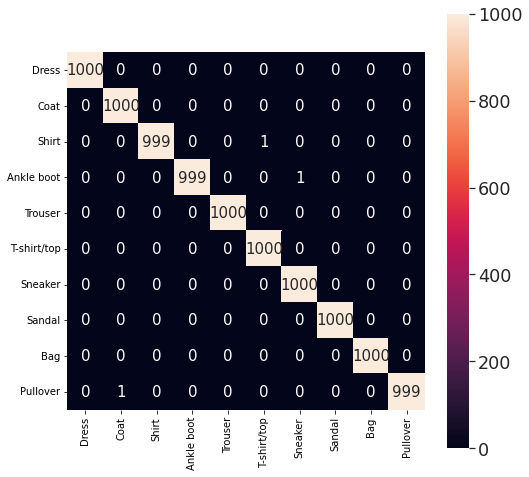

,precision,recall,f1-score,support
Ankle boot,1.000000,0.9990,0.9995,1000.0000
Bag,1.000000,1.0000,1.0000,1000.0000
Coat,0.999001,1.0000,0.9995,1000.0000
Dress,1.000000,1.0000,1.0000,1000.0000
Pullover,1.000000,0.9990,0.9995,1000.0000
Sandal,1.000000,1.0000,1.0000,1000.0000
Shirt,1.000000,0.9990,0.9995,1000.0000
Sneaker,0.999001,1.0000,0.9995,1000.0000
T-shirt/top,0.999001,1.0000,0.9995,1000.0000
Trouser,1.000000,1.0000,1.0000,1000.0000


In [13]:
print ( "Training Dataset ")
predict_x=model4.predict(X_train) 
Y_pred=np.argmax(predict_x,axis=1)
y_train = []
for x in Y_train:
  y_train.append(np. argmax(x, axis=None))
Y_pred = [labels[ind] for ind in Y_pred]
y_train = [labels[ind] for ind in y_train]
print_classification_report(Y_pred, y_train)

Testing Dataset 
              precision    recall  f1-score   support

  Ankle boot       0.96      0.97      0.97       100
         Bag       0.95      0.99      0.97       100
        Coat       0.87      0.93      0.90       100
       Dress       0.91      0.87      0.89       100
    Pullover       0.83      0.83      0.83       100
      Sandal       1.00      0.98      0.99       100
       Shirt       0.80      0.76      0.78       100
     Sneaker       0.96      0.97      0.97       100
 T-shirt/top       0.88      0.87      0.87       100
     Trouser       0.98      0.97      0.97       100

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



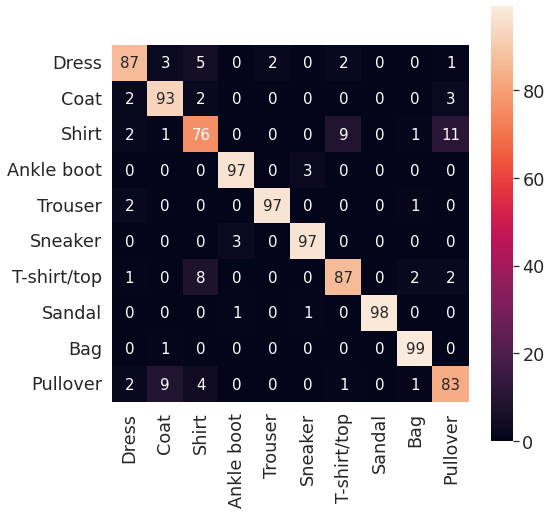

,precision,recall,f1-score,support
Ankle boot,0.960396,0.970,0.965174,100.000
Bag,0.951923,0.990,0.970588,100.000
Coat,0.869159,0.930,0.898551,100.000
Dress,0.906250,0.870,0.887755,100.000
Pullover,0.830000,0.830,0.830000,100.000
Sandal,1.000000,0.980,0.989899,100.000
Shirt,0.800000,0.760,0.779487,100.000
Sneaker,0.960396,0.970,0.965174,100.000
T-shirt/top,0.878788,0.870,0.874372,100.000
Trouser,0.979798,0.970,0.974874,100.000


In [14]:
print ( "Testing Dataset ")

predict_x=model4.predict(X_test) 
Y_pred=np.argmax(predict_x,axis=1)
y_test = []
for x in Y_test:
  y_test.append(np. argmax(x, axis=None))
Y_pred = [labels[ind] for ind in Y_pred]
y_test = [labels[ind] for ind in y_test]

print_classification_report(Y_pred, y_test)

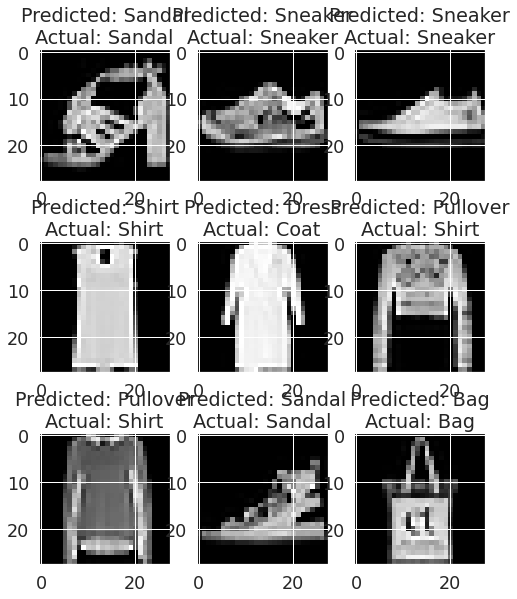

In [15]:
_, X, _, Y = train_test_split(x_test, Y_test, test_size=10, shuffle=True)
predictions = model4.predict(X)

plt.figure(figsize=(8,10))
for i in range(9):
    # define subplot
    value = model4.predict(x_test[i].reshape(1, 28, 28))
    predicted = value.argmax()
    actual = Y_test[i].argmax()
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.title("Predicted: " + labels[predicted] + "\nActual: " + labels[actual])
    plt.imshow(X_test[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

## Inferences and Conclusion : State all the key observations and conclusion